In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

file_path = 'C:/Users/spatan5/Desktop/New folder/final__master_data.csv'
data = pd.read_csv(file_path).dropna()
data['Month'] = data['Month'].apply(lambda x : int(x))
data['Month'] = data['Month'].astype('category')


In [2]:
relevant_cols = ['average_volume_50_days', 'quant_score_NER',
       'financial_performance_score', 'market_position_score',
       'strategic_direction_score', 'operational_aspects_score',
       'financial_indicators_score', 'risks_challenges_score',
       'economic_factors_score', '% Change Revenue', '% Change EPS GAAP',
       '% Change EPS Normalized',
       'perc_change_prev_7', 'perc_change_7_15']

In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
data['Month']

0        1
1        1
2        1
3        1
4        2
        ..
2260    11
2261    10
2262    10
2263    10
2264    10
Name: Month, Length: 2254, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [5]:
results = [] 
percentages = []

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [29]:
results = [] 
percentages = []
r2_scores = []
r2_scores_train = []
correlations = []
for _ in range (1000):

    data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data['Ticker'])
    
    scaler = StandardScaler()
    scaler.fit(data_train[relevant_cols])
    data_train[relevant_cols] = scaler.transform(data_train[relevant_cols])

    data_train['month_sin'] = np.sin(2 * np.pi * data_train['Month'].astype(int) / 12)
    data_train['month_cos'] = np.cos(2 * np.pi * data_train['Month'].astype(int) / 12)
    final_columns = relevant_cols + ['month_sin', 'month_cos']
    data_train_final = data_train[final_columns]
    
    linreg = LinearRegression()
    linreg.fit(data_train_final, data_train['perc_change_next_prev'])

    data_test[relevant_cols] = scaler.transform(data_test[relevant_cols])

    data_test['month_sin'] = np.sin(2 * np.pi * data_test['Month'].astype(int) / 12)
    data_test['month_cos'] = np.cos(2 * np.pi * data_test['Month'].astype(int) / 12)
    data_test_final = data_test[final_columns]
    
    y_predict = linreg.predict(data_test_final)

    y_train_predict = linreg.predict(data_train_final)
    y_train = data_train['perc_change_next_prev']
    r2_scores_train.append(r2_score(y_train, y_train_predict))

    y_new = data_test['perc_change_next_prev'] - y_predict
    cost_of_nothing = sum(abs(num) for num in data_test['perc_change_next_prev'])
    cost_of_strat = sum(abs(num) for num in y_new)

    results.append([cost_of_nothing, cost_of_strat])
    percentages.append((cost_of_nothing - cost_of_strat)*100/cost_of_nothing)

    r2_scores.append(r2_score(data_test['perc_change_next_prev'], y_predict))

    correlation = np.corrcoef(data_test['perc_change_next_prev'], y_predict)[0, 1]
    correlations.append(correlation)


    

(array([ 1.,  0.,  2.,  2.,  0.,  1.,  1.,  1.,  0.,  4.,  3.,  0.,  3.,
         1.,  2.,  3.,  3.,  2.,  5.,  2.,  8.,  8.,  4.,  7., 10.,  5.,
         8.,  6.,  8., 11.,  5., 11., 16.,  9., 11., 11., 14., 16., 19.,
        20., 18., 19., 19., 16., 19., 28., 20., 25., 21., 31., 26., 34.,
        17., 34., 31., 30., 34., 22., 38., 25., 27., 30., 15., 25., 16.,
        26., 14., 14.,  8., 11., 15.,  9.,  4.,  7.,  6.,  4.,  2.,  5.,
         0.,  1.,  3.,  3.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.03923349, 0.03966699, 0.0401005 , 0.040534  , 0.0409675 ,
        0.041401  , 0.0418345 , 0.042268  , 0.04270151, 0.04313501,
        0.04356851, 0.04400201, 0.04443551, 0.04486902, 0.04530252,
        0.04573602, 0.04616952, 0.04660302, 0.04703653, 0.04747003,
        0.04790353, 0.04833703, 0.04877053, 0.04920404, 0.04963754,
        0.05007104, 0.05050454, 0.05093804, 0.05137155, 0.05180505,
        0.05223855, 0.0526

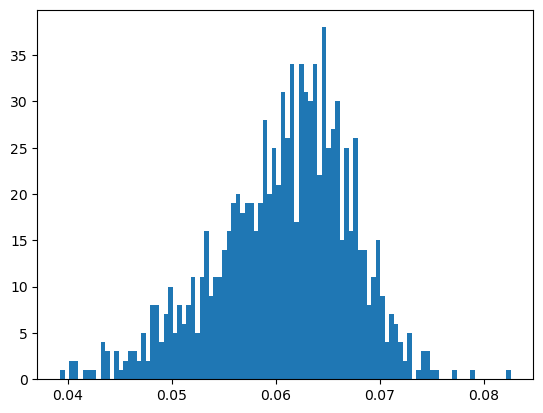

In [30]:
import matplotlib.pyplot as plt

plt.hist(r2_scores_train, bins = 100)

In [8]:
correlation = np.corrcoef(data_test['perc_change_next_prev'], y_predict)[0, 1]
print(f"Correlation using NumPy: {correlation}")

Correlation using NumPy: 0.150845460401895


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  3.,  1.,  1.,
         3.,  1.,  3.,  1.,  1.,  3.,  5., 10., 10., 14., 12., 23., 15.,
        24., 22., 19., 31., 42., 40., 32., 51., 46., 49., 49., 59., 44.,
        47., 46., 48., 38., 42., 28., 23., 17., 19., 15., 14., 11.,  9.,
         6.,  5.,  2.,  5.,  0.,  0.,  1.,  0.,  2.]),
 array([-0.21611064, -0.21298217, -0.20985371, -0.20672524, -0.20359677,
        -0.20046831, -0.19733984, -0.19421137, -0.19108291, -0.18795444,
        -0.18482598, -0.18169751, -0.17856904, -0.17544058, -0.17231211,
        -0.16918364, -0.16605518, -0.16292671, -0.15979824, -0.15666978,
        -0.15354131, -0.15041285, -0.14728438, -0.14415591, -0.14102745,
        -0.13789898, -0.13477051, -0.13164205, -0.12851358, -0.125385

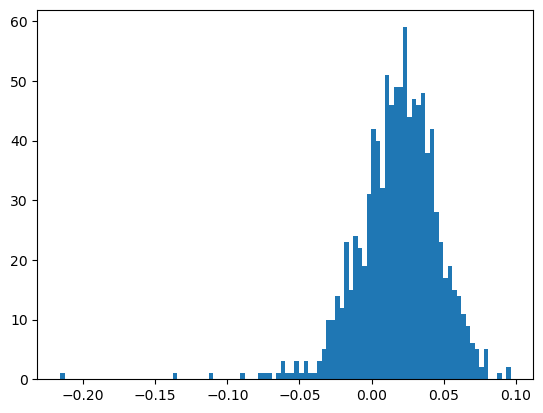

In [27]:
import matplotlib.pyplot as plt

plt.hist(r2_scores, bins = 100)

In [10]:
len(results)

1000

In [11]:
len(percentages)

1000

In [12]:
results

[[1736.590000000002, 1672.1000447168783],
 [1776.5099999999993, 1732.6081150216332],
 [1668.309999999999, 1651.773857127505],
 [1778.8499999999992, 1757.1878425850575],
 [1781.09, 1780.637104305995],
 [1773.6100000000006, 1732.3078868298119],
 [1684.1799999999976, 1626.3581537461012],
 [1698.7999999999986, 1673.9167641096521],
 [1643.5300000000016, 1613.5659118533413],
 [1595.9999999999998, 1555.7163202351126],
 [1642.529999999999, 1614.0639927080172],
 [1579.4499999999996, 1551.137610136257],
 [1572.2899999999977, 1568.5224733945577],
 [1656.770000000002, 1617.026827086854],
 [1680.7399999999998, 1632.7469071470512],
 [1709.6800000000005, 1719.0120796175222],
 [1585.1400000000003, 1586.4813779086514],
 [1619.3, 1603.838628678112],
 [1703.2300000000016, 1696.919391708282],
 [1701.6699999999998, 1678.9314443104795],
 [1660.1700000000003, 1655.7038092236157],
 [1631.5700000000004, 1636.5045178345872],
 [1704.7599999999998, 1686.1310062780794],
 [1766.6599999999999, 1754.1799153416027],
 

In [13]:
percentages

[3.713597065693318,
 2.4712433354366756,
 0.9911912577694865,
 1.2177618919493893,
 0.02542800723179836,
 2.3287032194331725,
 3.4332343486976744,
 1.4647537020453534,
 1.8231543170286066,
 2.5240400855192493,
 1.7330585920489678,
 1.792547397115611,
 0.2396203375611389,
 2.3988346549700954,
 2.8554739491502925,
 -0.5458377952319546,
 -0.08462204654800907,
 0.9548182129245977,
 0.3705082867093412,
 1.336249430825034,
 0.26902008688173884,
 -0.3024398484028765,
 1.0927634225298768,
 0.7064225520698447,
 0.6286006421551464,
 2.4414396775675273,
 0.9297748555709766,
 -0.010353760644546094,
 1.0626189251587383,
 2.222725880241545,
 2.346629028703428,
 1.6447974700415549,
 1.8801023568966342,
 0.20884772508422156,
 1.056773310398241,
 1.6803266994184964,
 1.9346479636437912,
 2.016717529522486,
 1.6628885004977494,
 1.5999516338922475,
 1.3209759481605374,
 0.5573650987393032,
 3.473135772969372,
 1.1334032628990112,
 0.790774373692018,
 3.5604128290207946,
 1.4281058086092573,
 2.412830512

In [14]:
sum(percentages)/len(percentages)

1.277733282361493

In [15]:
percentages = np.array(percentages)

In [16]:
percentages.std()

1.3649397451279748

In [17]:
percentages.mean()

1.2777332823614929

In [18]:
percentages.max()

5.1212796401009415

In [19]:
np.percentile(percentages, 20)

0.1713102439763325

In [20]:
np.percentile(percentages, 75)

2.217429038419287

In [21]:
percentages.min()

-3.971798567912993

In [22]:
y_new.var()

24.185636249346892

In [23]:
data_test['perc_change_next_prev'].var()

23.78830508203993

In [24]:
# Why is linreg failing?